<a href="https://colab.research.google.com/github/Matthew17utec/prog3_compilacion/blob/master/Tema_2_Regresion_Lineal_M%C3%BAltiple_2023_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

 # Práctica Guiada 2.
 ----
  
  Universidad : UTEC \\
  Curso       : Inteligencia Artificial \\
  Profesor    : Cristian López Del Alamo \\
  Tema        : Regresión Lineal Múltiple \\
  

 ----




1.  En esta práctica se pide realizar pruebas utilizando   diferentes funciones de pérdida.

2.  Su equipo debe implementar el algoritmo de machine learning para  regresión lineal múltiple y realizar las correspondientes pruebas usando el siguiente  [Dataset](
https://docs.google.com/spreadsheets/d/10wC32tLXK9xHfsQ6DuDSQIqEi4qPLogfThHwATvVgpc/edit?usp=sharing
).  

3. MSE Loss Function \\

  $MSE = \frac{1}{2m}\sum_{i=0}^m (y_i - h(x_i))^2$

4. Utilize todo los datos del dataset para entrenar  y grafique el plano que mejor separa a los datos. [Help](https://stackoverflow.com/questions/36060933/matplotlib-plot-a-plane-and-points-in-3d-simultaneously)

Importante: No se olvide de normalizar los datos entre cero y uno, por cada columna.





In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Crear el DataSet







In [ ]:
import pandas as pd
import numpy as np

dataset = pd.read_csv('/content/drive/MyDrive/UTEC/CURSOS/2022.2/Inteligencia Artificial/DataSet/db.csv')
X = dataset[["Year","Population"]]
Y = dataset["Employed"]









    bias      Year  Population
0    1.0  0.000000    0.000000
1    1.0  0.066667    0.045566
2    1.0  0.133333    0.096338
3    1.0  0.200000    0.147777
4    1.0  0.266667    0.198772
5    1.0  0.333333    0.251947
6    1.0  0.400000    0.333111
7    1.0  0.466667    0.383171
8    1.0  0.533333    0.435189
9    1.0  0.600000    0.495083
10   1.0  0.666667    0.571219
11   1.0  0.733333    0.638188
12   1.0  0.800000    0.701197
13   1.0  0.866667    0.790282
14   1.0  0.933333    0.900814
15   1.0  1.000000    1.000000


/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)
/usr/local/lib/python3.9/dist-packages/numpy/core/fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)


# Modelo

Nota: Antes añadir Añadir una columna de nx1 a X con valor 1.

$h(X) = X*W^t$



In [ ]:

def h(X, W):
    # write your code here
    # your code returns a  n by 1 vector. This  vector contains the prediction for all data



# Loss function
Nota: La función de pérdida no cambia, solo la llamada a la función h
$\mathcal{L} =  ||Y - XW^t||_2^2$



In [ ]:
def Error(X, W,Y):
  #return sum((Y - h(X,W))**2)/(2*len(Y))

   # write your code here,


# Cálculo de derivadas
Nota: Intente resolver este algoritmo desde un punto de vista matricial.

$dw_j = \frac{1}{m}\sum_{i=0}^m(y_i - h(x_i))(-x_{ij})$

In [ ]:
def derivada(X, W, Y):
    # write your code here
    # Return a (k+1)x1 vector. This vector contains the derivatives from Loss function
    # respect to all variable w_j



# Actualiación de parámetros

Recuerde: $\frac{\partial L}{\partial w}$ representa un vector con todas las derivadas de la función de pérdida con rescto a W.

$W  = W - \alpha*\frac{\partial L}{\partial W} $



In [ ]:
def update(W,  dW, alpha):
# W is a (kx1) vector
# dW is a (kx1) vector with the derivatives of the loss function with respect to W
# alpha is a float number between 0 and 1

 # write your code here

  return W

# Training

In [ ]:
def train(X, Y, epochs, alfa):
    W = np.random.random(X.shape[1])
    L = Error(X,W,Y)
    loss = []
    for i in range(epochs):
        dW = derivada(X, W, Y)
        W = update(W,alfa, dW)
        L = Error(X, W,Y)
        loss.append(L)
        if ((i%1000)==0):
          print("loss value error :" + str(L))
    return W, loss



def Plot_Loss(epochs,loss):
   plt.plot(epochs, loss)


<ipython-input-70-528d47ed6f77>:5: FutureWarning: Calling a ufunc on non-aligned DataFrames (or DataFrame/Series combination). Currently, the indices are ignored and the result takes the index/columns of the first DataFrame. In the future , the DataFrames/Series will be aligned before applying the ufunc.
Convert one of the arguments to a NumPy array (eg 'ufunc(df1, np.asarray(df2)') to keep the current behaviour, or align manually (eg 'df1, df2 = df1.align(df2)') before passing to the ufunc to obtain the future behaviour and silence this warning.
  return np.matmul((Y - h(X,W)), -1*X)/(len(Y))


loss value error :0.05255079145095358
loss value error :0.011792047642911365


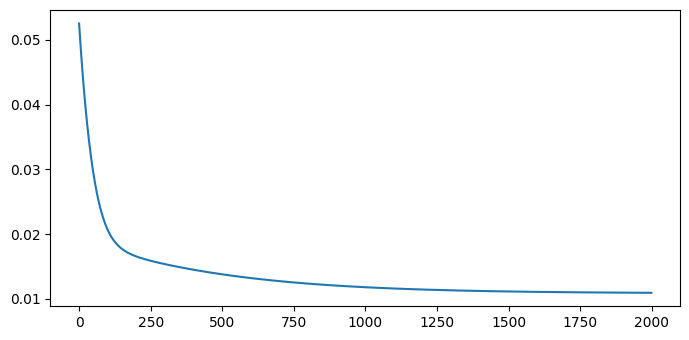

In [ ]:
plot()

In [ ]:
### Plot plane example
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams["figure.figsize"] = [7.00, 3.50]
plt.rcParams["figure.autolayout"] = True

x = np.linspace(-10, 10, 100)
y = np.linspace(-10, 10, 100)

x, y = np.meshgrid(x, y)
# ecuacion del plano: x_1w_1 + x_2w_2 + b

eq = 0.1 * x + 40 * y + 100.09

fig = plt.figure()

ax = fig.gca(projection='3d')

ax.plot_surface(x, y, eq)

plt.show()

# Testing

In [ ]:
# Change the values of umbral and alpha and try to obtain a good result

W = train(x, y, 1000,  0.001)

